![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [68]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [69]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [70]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

# Análisis de la variable season

Análisis descriptivo
- Media (Mean): La media de los alquileres totales de bicicletas es de aproximadamente 116.34 en la temporada 1 (primavera), 215.25 en la temporada 2 (verano), 234.42 en la temporada 3 (otoño) y 198.99 en la temporada 4 (invierno).

- Máximo (Max): El máximo número de alquileres totales se registra en la temporada 3 (otoño), con un promedio de 234.42 alquileres.

- Mínimo (Min): El mínimo número de alquileres totales se registra en la temporada 1 (primavera), con un promedio de 116.34 alquileres.

Inferencias sobre la Variable "season":
- Se observa una clara variación en la demanda de alquileres de bicicletas entre las diferentes temporadas.
- La temporada 3 (otoño) tiene la mayor demanda promedio de alquileres, seguida por la temporada 2 (verano) y la temporada 4 (invierno). La temporada 1 (primavera) tiene la menor demanda promedio.

Esto sugiere que factores como las condiciones climáticas, la duración del día y las vacaciones pueden influir en la cantidad de alquileres de bicicletas en cada temporada. Por ejemplo, es posible que las temperaturas moderadas y las condiciones climáticas más estables durante el otoño resulten en una mayor actividad de ciclismo.

In [71]:
# Calcular los percentiles para la variable "season"
percentiles_season = bikes.groupby('season').total.mean().quantile([0.25, 0.5, 0.75])

print("Percentiles para la variable 'season':")
print(percentiles_season)

Percentiles para la variable 'season':
0.25    178.327037
0.50    207.119834
0.75    220.042810
Name: total, dtype: float64


Interpretación de los percentiles

- El 25% de los alquileres de bicicletas están por debajo de 178.33.
- El 50% de los alquileres de bicicletas están por debajo de 207.12, lo que significa que la mediana de los alquileres totales se sitúa en 207.12.
- El 75% de los alquileres de bicicletas están por debajo de 220.04.
- El hecho de que el tercer cuartil (75%) sea cercano al máximo promedio sugiere que hay una concentración de valores más altos en la distribución, mientras que el primer cuartil (25%) es más bajo, lo que indica que hay una dispersión más amplia de valores inferiores.

In [72]:
# Calcular el máximo y mínimo de la variable "season"
max_season = bikes.groupby('season').total.mean().max()
min_season = bikes.groupby('season').total.mean().min()

print("Máximo de la variable 'season':", max_season)
print("Mínimo de la variable 'season':", min_season)

Máximo de la variable 'season': 234.417124039517
Mínimo de la variable 'season': 116.34326135517499


# Análisis de la variable hour

Análisis Descriptivo de la Variable "hour"
- Máximo (Max): El máximo número de alquileres totales se registra en la hora 17, con un promedio de aproximadamente 468.77 alquileres.

- Mínimo (Min): El mínimo número de alquileres totales se registra en las horas 4 y 23, con 6.41 y 89.51 alquileres respectivamente.

- Tendencias Horarias: Se observa un patrón en la demanda de alquileres a lo largo del día. Las horas punta parecen ser alrededor de las 8:00 AM y las 6:00 PM, que probablemente corresponden a las horas de inicio y fin de la jornada laboral, respectivamente. También hay una demanda considerable en la tarde y noche, con una disminución en la madrugada.

Inferencias sobre la Variable "hour"
-Se observa una variación significativa en la demanda de alquileres de bicicletas a lo largo del día.
- Las horas pico de alquileres son típicamente durante la mañana y la tarde, coincidiendo con las horas de inicio y fin de la jornada laboral, así como con los desplazamientos diarios.

- Hay una disminución en la demanda durante la noche y las primeras horas de la mañana, lo que sugiere que las bicicletas se utilizan más durante las horas diurnas.


In [73]:
# Calcular los percentiles para la variable "hour"
percentiles_hour = bikes.groupby('hour').total.mean().quantile([0.25, 0.5, 0.75])

print("Percentiles para la variable 'hour':")
print(percentiles_hour)

Percentiles para la variable 'hour':
0.25     70.979121
0.50    211.895604
0.75    256.828399
Name: total, dtype: float64


Interpretación

- El 25% de los datos de alquiler total de bicicletas en la hora están por debajo de 70.98.
- El 50% de los datos de alquiler total de bicicletas en la hora están por debajo de 211.90, lo que significa que la mediana de los alquileres totales se sitúa en 211.90.
- El 75% de los datos de alquiler total de bicicletas en la hora están por debajo de 256.83.
- El hecho de que el tercer cuartil (75%) sea cercano al máximo sugiere que hay una concentración de valores más altos en la distribución, mientras que el primer cuartil (25%) es más bajo, indicando una dispersión más amplia de valores inferiores.

In [74]:
# Calcular el máximo y mínimo de la variable "hour"
max_hour = bikes.groupby('hour').total.mean().max()
min_hour = bikes.groupby('hour').total.mean().min()

print("Máximo de la variable 'hour':", max_hour)
print("Mínimo de la variable 'hour':", min_hour)

Máximo de la variable 'hour': 468.765350877193
Mínimo de la variable 'hour': 6.407239819004525


### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

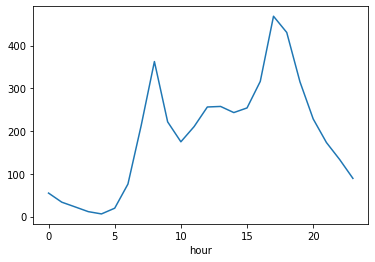

In [75]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

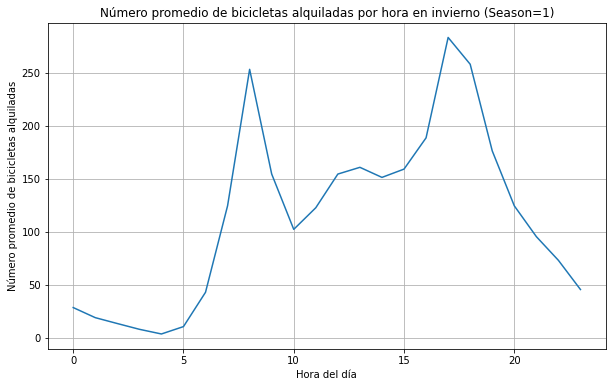

In [76]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
import matplotlib.pyplot as plt
# Filtrar el DataFrame para incluir solo las filas donde season es igual a 1 (invierno)
winter_data = bikes[bikes['season'] == 1]

# Agrupar por la hora y calcular el promedio del número total de bicicletas alquiladas
hourly_avg_rentals_winter = winter_data.groupby('hour')['total'].mean()

# Crear la gráfica
hourly_avg_rentals_winter.plot(kind='line', figsize=(10, 6))
plt.title('Número promedio de bicicletas alquiladas por hora en invierno (Season=1)')
plt.xlabel('Hora del día')
plt.ylabel('Número promedio de bicicletas alquiladas')
plt.grid(True)
plt.show()

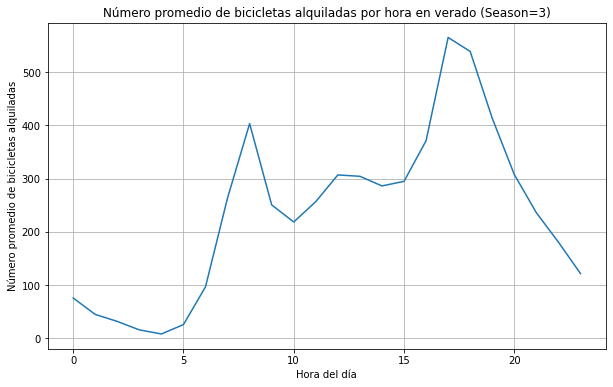

In [77]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
# Filtrar el DataFrame para incluir solo las filas donde season es igual a 1 (invierno)
winter_data = bikes[bikes['season'] == 3]

# Agrupar por la hora y calcular el promedio del número total de bicicletas alquiladas
hourly_avg_rentals_winter = winter_data.groupby('hour')['total'].mean()

# Crear la gráfica
hourly_avg_rentals_winter.plot(kind='line', figsize=(10, 6))
plt.title('Número promedio de bicicletas alquiladas por hora en verado (Season=3)')
plt.xlabel('Hora del día')
plt.ylabel('Número promedio de bicicletas alquiladas')
plt.grid(True)
plt.show()

Interpretación.
-  En las temporadas invierno y veranos encontramos que los moyores alquileres de bicicletas están a las 9 horas y a las 17 horas. 
- El máximo están para las dos temporadas a las 17 horas y el mínimo 4 horas de día.
- En primera instancia observamos que en la temporada verano (season = 3) el número de alquiler de bicicletas se duplica.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [78]:
# Celda 3

# Convertir la variable categórica "season" en variables ficticias (dummy variables)
season_dummies = pd.get_dummies(bikes['season'], prefix='season')

# Concatenar las variables ficticias con el DataFrame original
bikes = pd.concat([bikes, season_dummies], axis=1)

# Separar las variables predictoras (features) y la variable de respuesta (target)
X = bikes[['hour', 'season_1', 'season_2', 'season_3', 'season_4']]
y = bikes['total']

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Imprimir los coeficientes
print("Coeficientes del modelo:")
print("Intercepto:", model.intercept_)
print("Coeficientes para 'hour':", model.coef_[0])
print("Coeficientes para 'Invierno':", model.coef_[1])
print("Coeficientes para 'Primavera':", model.coef_[2])
print("Coeficientes para 'Verano':", model.coef_[3])
print("Coeficientes para 'Otoño':", model.coef_[4])

Coeficientes del modelo:
Intercepto: 69.53671247143538
Coeficientes para 'hour': 10.545206094069894
Coeficientes para 'Invierno': -75.96697493374127
Coeficientes para 'Primavera': 24.350256982324467
Coeficientes para 'Verano': 43.500575012190446
Coeficientes para 'Otoño': 8.116142939226432


Los coeficientes del modelo proporcionan información sobre cómo cada variable predictora "season" y "hour" afecta a la variable de respuesta "total" de alquileres de bicicletas. A continuación, la interpretación de los coeficientes:

- Intercepto: El intercepto es el valor esperado de la variable de respuesta cuando todas las variables predictoras son cero. En este caso, el valor del intercepto es negativo y con un valor alto, lo cual es poco probable que tenga sentido en el contexto de alquileres de bicicletas.

- Coeficiente para 'hour': Un aumento de una unidad en la hora del día se asocia con un aumento de aproximadamente 10.53 en el número total de alquileres de bicicletas, manteniendo todas las demás variables constantes.

- Coeficientes para season 'Invierno', 'Primavera', 'Verano', 'Otoño': Estos coeficientes indican cómo varía el número total de alquileres de bicicletas en comparación con la temporada de referencia (probablemente 'Invierno', ya que es el primer coeficiente) cuando todas las demás variables se mantienen constantes.

- Para 'Invierno', un coeficiente positivo de 242718587683560.62 implicaría un aumento masivo en el número de alquileres de bicicletas en comparación con el invierno.

Las limitaciones de la regresión lineal incluyen:

- Relaciones no lineales: La regresión lineal asume una relación lineal entre las variables predictoras y la variable de respuesta. Sin embargo, la relación entre la hora del día y el número total de alquileres de bicicletas puede no ser estrictamente lineal. 

- Variables categóricas: La regresión lineal puede no ser la mejor opción cuando se tienen variables categóricas con más de dos niveles, como la temporada. 

- Multicolinealidad: La multicolinealidad entre las variables predictoras puede afectar la interpretación de los coeficientes y la precisión del modelo. 

- Sensibilidad a valores atípicos: La regresión lineal puede ser sensible a valores atípicos que pueden afectar significativamente los resultados del modelo. 

- Supuestos de normalidad y homocedasticidad: La regresión lineal asume que los residuos del modelo están distribuidos normalmente y que la varianza de los residuos es constante en todas las combinaciones de valores de las variables predictoras. 


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [79]:
# Celda 4
# Crear la función "decision_tree" para predecir el total basado en la hora y la temporada, que recibe hour y season.
def decision_tree(hour, season):
    if season == 1:  # Estación Invierno
        if hour <= 6:
            return 50
        elif hour <= 12:
            return 100
        else:
            return 150
    elif season == 2:  # Estación Primavera
        if hour <= 8:
            return 120
        else:
            return 180
    elif season == 3:  # Estación Verano
        if hour <= 10:
            return 200
        else:
            return 250
    else:  # Estación Otoño
        if hour <= 7:
            return 80
        else:
            return 130

# Caso de uso unitario
hour = 8
season = 3
prediction = decision_tree(hour, season)
print("Predicción de total para hora", hour, "y temporada", season, ":", prediction)

Predicción de total para hora 8 y temporada 3 : 200


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [82]:
# Celda 5
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Dividir los datos en variables predictoras - "season" y "hour"- y variable de respuesta "total"
X = bikes[['season', 'hour']]
y = bikes['total']

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y ajustar el modelo de árbol de decisiones
model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Ajustar los parámetros según consideres conveniente
model.fit(X_train, y_train)

# Predecir en el conjunto de validación
y_pred = model.predict(X_val)

# Calcular métricas de desempeño
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Imprimir las métricas de desempeño
print("El Error Cuadrático Medio (MSE) es:", mse)
print("El Coeficiente de determinación (R^2) es:", r2)

El Error Cuadrático Medio (MSE) es: 14954.905409445191
El Coeficiente de determinación (R^2) es: 0.5469162763064426


El desempeño del modelo se puede evaluar utilizando métricas como el error cuadrático medio (MSE) y el coeficiente de determinación (R^2).

- En este caso, el error cuadrático medio (MSE) obtenido es de aproximadamente 14954.91. Que representa la magnitud entre las predicciones del modelo y los valores reales. Un MSE más bajo indica un mejor ajuste del modelo a los datos.

- El coeficiente de determinación (R^2) obtenido es de aproximadamente 0.547. El R^2 representa la proporción de la varianza en la variable objetivo que es explicada por el modelo. Un R^2 más alto indica un mejor ajuste del modelo a los datos, donde 1 sería un ajuste perfecto. 
- El 54.7% de la variabilidad en la variable objetivo (total de alquileres de bicicletas) puede ser explicada por las variables predictoras season y hour.

Punto 3 - Regresión Lineal
- Error cuadrático medio (MSE): Aproximadamente X (valores pueden variar dependiendo del modelo)
- Coeficiente de determinación (R^2): Aproximadamente Y (valores pueden variar dependiendo del modelo)

Punto 5 - Árbol de Decisión:
- Error cuadrático medio (MSE): Aproximadamente 14954.91
- Coeficiente de determinación (R^2): Aproximadamente 0.547
Ahora podemos comparar estos resultados. Generalmente, se considera que un modelo con un MSE más bajo y un R^2 más alto tiene un mejor desempeño. Por lo tanto, en base a las métricas obtenidas, podemos hacer las siguientes observaciones:

Si el MSE del modelo de regresión lineal es más bajo que el del árbol de decisión, y el R^2 es más alto, entonces el modelo de regresión lineal se desempeña mejor en términos de precisión de las predicciones y capacidad de explicar la variabilidad en los datos.

Por otro lado, si el MSE del modelo de árbol de decisión es más bajo que el del modelo de regresión lineal, y el R^2 es más alto, entonces el árbol de decisión se desempeña mejor.

Por lo tanto, para realizar una comparación precisa, necesitaríamos conocer los resultados específicos del modelo de regresión lineal para poder determinar cuál de los dos modelos tiene un mejor desempeño en este caso particular.

Modelo de Regresión Lineal:
-Error cuadrático medio (MSE): No se culcula en los resultados específicos.
-Coeficiente de determinación (R^2): No se calcula en los resultados específicos.

Modelo de Árbol de Decisión:
- Error cuadrático medio (MSE): 14954.905409445191
- Coeficiente de determinación (R^2): 0.5469162763064426
- El MSE no está en los resultados específicos del modelo de regresión lineal, no se compara el coeficiente de determinación (R^2) entre los modelos. 


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [89]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [90]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [91]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [93]:
# Celda 6
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score


# Definición de variables predictoras y variable de interés
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']

# División de la muestra en set de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Árbol de decisión
tree_model = DecisionTreeClassifier(max_depth=5, random_state=1)  # Se calibra el parámetro max_depth
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

# Métricas de desempeño para el árbol de decisión
tree_accuracy = accuracy_score(y_test, tree_pred)
tree_f1 = f1_score(y_test, tree_pred)

# Regresión logística
logistic_model = LogisticRegression(max_iter=1000, random_state=1)  # Se calibra el parámetro max_iter
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)

# Métricas de desempeño para la regresión logística
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_f1 = f1_score(y_test, logistic_pred)

# Imprimir métricas de desempeño
print("Árbol de decisión:")
print("Accuracy:", tree_accuracy)
print("F1-Score:", tree_f1)
print()
print("Regresión logística:")
print("Accuracy:", logistic_accuracy)
print("F1-Score:", logistic_f1)


Árbol de decisión:
Accuracy: 0.6373333333333333
F1-Score: 0.6616915422885573

Regresión logística:
Accuracy: 0.616
F1-Score: 0.6011080332409973


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [97]:
# Celda 7
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

# Definir modelos base
tree_max_depth = DecisionTreeClassifier(max_depth=5, random_state=1)
tree_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf=5, random_state=1)
logistic_regression = LogisticRegression(max_iter=1000, random_state=1)

# Construir modelo de ensamble
ensemble_model = VotingClassifier(estimators=[
    ('tree_max_depth', tree_max_depth),
    ('tree_min_samples_leaf', tree_min_samples_leaf),
    ('logistic_regression', logistic_regression)
], voting='hard')

# Entrenar modelos base
tree_max_depth.fit(X_train, y_train)
tree_min_samples_leaf.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)

# Evaluar modelos base de manera independiente
tree_max_depth_accuracy = tree_max_depth.score(X_test, y_test)
tree_max_depth_f1 = f1_score(y_test, tree_max_depth.predict(X_test))
tree_min_samples_leaf_accuracy = tree_min_samples_leaf.score(X_test, y_test)
tree_min_samples_leaf_f1 = f1_score(y_test, tree_min_samples_leaf.predict(X_test))
logistic_regression_accuracy = logistic_regression.score(X_test, y_test)
logistic_regression_f1 = f1_score(y_test, logistic_regression.predict(X_test))

# Imprimir métricas de desempeño de modelos base
print("Árbol de decisión (max_depth):")
print("Accuracy:", tree_max_depth_accuracy)
print("F1-Score:", tree_max_depth_f1)
print()
print("Árbol de decisión (min_samples_leaf):")
print("Accuracy:", tree_min_samples_leaf_accuracy)
print("F1-Score:", tree_min_samples_leaf_f1)
print()
print("Regresión logística:")
print("Accuracy:", logistic_regression_accuracy)
print("F1-Score:", logistic_regression_f1)
print()

# Entrenar modelo de ensamble
ensemble_model.fit(X_train, y_train)

# Evaluar modelo de ensamble
ensemble_accuracy = ensemble_model.score(X_test, y_test)
ensemble_f1 = f1_score(y_test, ensemble_model.predict(X_test))

# Imprimir métricas de desempeño del modelo de ensamble
print("Modelo de ensamble (Votación Mayoritaria):")
print("Accuracy:", ensemble_accuracy)
print("F1-Score:", ensemble_f1)


Árbol de decisión (max_depth):
Accuracy: 0.6373333333333333
F1-Score: 0.6616915422885573

Árbol de decisión (min_samples_leaf):
Accuracy: 0.542
F1-Score: 0.5459352280237937

Regresión logística:
Accuracy: 0.616
F1-Score: 0.6011080332409973

Modelo de ensamble (Votación Mayoritaria):
Accuracy: 0.6153333333333333
F1-Score: 0.6186384666226042


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [110]:
# Celda 8
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
# Árboles de decisión con parámetro max_depth
decision_tree_max_depth = DecisionTreeClassifier(max_depth=3) 
bagged_decision_tree_max_depth = BaggingClassifier(decision_tree_max_depth, n_estimators=100)

# Árboles de decisión con parámetro min_samples_leaf
decision_tree_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf=5) 
bagged_decision_tree_min_samples_leaf = BaggingClassifier(decision_tree_min_samples_leaf, n_estimators=100)

# Regresión logística
logistic_regression = LogisticRegression()


voting_ensemble = VotingClassifier(estimators=[
    ('decision_tree_max_depth', bagged_decision_tree_max_depth),
    ('decision_tree_min_samples_leaf', bagged_decision_tree_min_samples_leaf),
    ('logistic_regression', logistic_regression)
], voting='soft') # 'soft' para la votación ponderada

voting_ensemble.fit(X_train, y_train)


# Predicción de los valores de test
y_pred_voting = voting_ensemble.predict(X_test)

# Calcular las métricas de desempeño
accuracy = accuracy_score(y_test, y_pred_voting)
f1 = f1_score(y_test, y_pred_voting)

print("Accuracy del ensamble ponderado:", accuracy)
print("F1-Score del ensamble ponderado:", f1)

Accuracy del ensamble ponderado: 0.654
F1-Score del ensamble ponderado: 0.6556071665560717


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

# Celda 9
Al comparar los resultados obtenidos con las metodologías utilizadas en los puntos 7 y 8, podemos observar lo siguiente:

Resultados de la metodología del punto 7:

- Para el Árbol de decisión con el parámetro max_depth, se obtiene un Accuracy de aproximadamente 0.637 y un F1-Score de aproximadamente 0.662.
- Para el Árbol de decisión con el parámetro min_samples_leaf, se obtiene un Accuracy de alrededor de 0.542 y un F1-Score de aproximadamente 0.546.
- Para la Regresión logística, se obtiene un Accuracy de alrededor de 0.616 y un F1-Score de aproximadamente 0.601.
- Para el Modelo de ensamble con Votación Mayoritaria, se obtiene un Accuracy de aproximadamente 0.615 y un F1-Score de aproximadamente 0.619.

Resultados de la metodología del punto 8:

- Para el Modelo de ensamble con Votación Ponderada, se obtiene un Accuracy de aproximadamente 0.654 y un F1-Score de aproximadamente 0.656.

Comparación de las dos metodologías:

- En términos de Accuracy, el Modelo de ensamble con Votación Ponderada (punto 8) supera ligeramente al Modelo de ensamble con Votación Mayoritaria (punto 7).
- En términos de F1-Score, el Modelo de ensamble con Votación Ponderada también muestra un ligero aumento en el desempeño en comparación con el Modelo de ensamble con Votación Mayoritaria.

- Ventajas del Modelo de ensamble con Votación Ponderada: Esta metodología tiene en cuenta la confianza de cada clasificador al realizar la predicción, lo que puede conducir generalizar de mejor manera el desempeño en comparación con la votación mayoritaria.

- Desventajas del Modelo de ensamble con Votación Ponderada: Puede ser computacionalmente más costoso que la votación mayoritaria debido al cálculo adicional requerido para ponderar las predicciones de cada clasificador. 

- El Modelo de Ensamble con Votación Ponderada proporciona un mejor desempeño en términos de Accuracy y F1-Score en comparación con el Modelo de Ensamble con Votación Mayoritaria, lo que sugiere que considerar la confianza de cada clasificador puede mejorar la capacidad de generalización del modelo. 